## **Universidad Peruana de Ciencias Aplicadas**
### CC235 - Procesamiento de Imágenes
### Segmentación de imágenes

---

In [2]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local
from skimage.measure import label, regionprops
from skimage.transform import rescale
from skimage.exposure  import equalize_hist
from termcolor import colored

### Obtener los datos

In [5]:
!gdown https://drive.google.com/uc?id=1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT -O img.zip
!unzip img.zip
imagenes = os.listdir('img')

Downloading...
From: https://drive.google.com/uc?id=1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT
To: d:\Codes\image-processing\src\7_Segmentacion\img.zip

  0%|          | 0.00/1.14M [00:00<?, ?B/s]
 46%|████▌     | 524k/1.14M [00:00<00:00, 3.88MB/s]
100%|██████████| 1.14M/1.14M [00:00<00:00, 5.73MB/s]


Archive:  img.zip
  inflating: img/S_.1.70.jpeg        
  inflating: img/S_3.00.jpeg         
  inflating: img/S_.2.90.jpeg        
  inflating: img/S_.2.80.jpeg        
  inflating: img/S_.2.60.jpeg        
  inflating: img/S_.1.90.jpeg        
  inflating: img/S_.1.60.jpeg        
  inflating: img/S_.2.70.jpeg        
  inflating: img/S_.1.80.jpeg        


### Preprocesar la imágen, umbralizar y etiquetar componentes conectados

In [6]:
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

TypeError: peak_local_max() got an unexpected keyword argument 'indices'

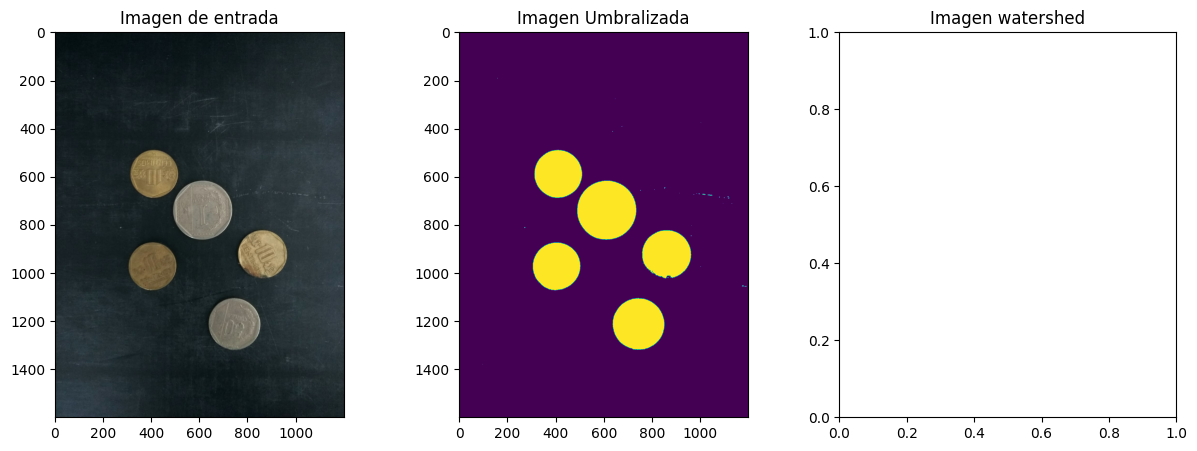

In [8]:
#@title Default title text { run: "auto" }
im_id = 2 #@param {type:"slider", min:0, max:8, step:1}

im_filename = imagenes[im_id]
im_path = os.path.join('img',im_filename)
im = imread(im_path)
im_grayscale = im[:,:,0]
im_grayscale -= im_grayscale.min()
im_grayscale = im_grayscale/im_grayscale.max()
th = threshold_otsu(im_grayscale)
im_th = im_grayscale>th
im_labeled = label(im_th)

#Mostrar imagenes
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagen de entrada")
plt.imshow(im)
plt.subplot(1,4,2)
plt.title("Imagen Umbralizada")
plt.imshow(im_th)
plt.subplot(1,4,3)
plt.title("Imagen watershed")
distance = ndimage.distance_transform_edt(im_th)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=im_th)
markers = ndimage.label(local_maxi)[0]
print(markers)
labels = watershed(-distance, markers, mask=im_th)
plt.imshow(labels, cmap='nipy_spectral')
plt.subplot(1,4,4)
plt.title("Componentes conectados")
plt.imshow(im_labeled, cmap='nipy_spectral')

Radio de la moneda: 98.97628532730626


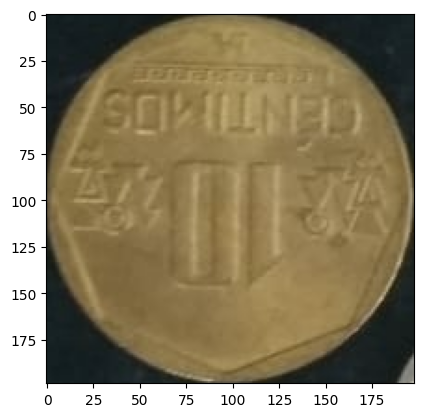

Radio de la moneda: 122.7575929696938


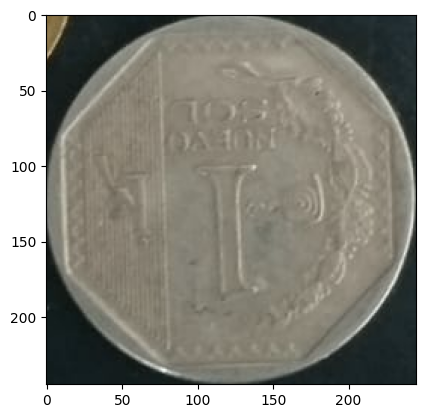

Radio de la moneda: 100.10192414267435


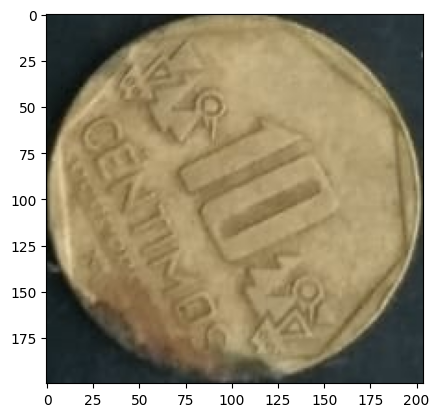

Radio de la moneda: 98.59445021991239


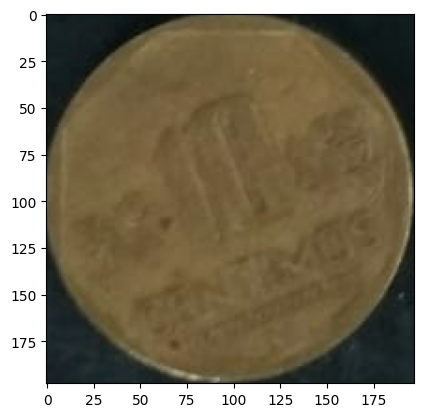

Radio de la moneda: 107.04298656594888


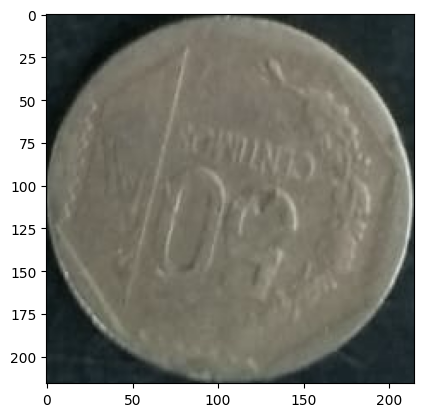

El total de dinero es: 5.00


In [9]:
from skimage.measure import regionprops

a_min, a_max = np.pi*80**2, np.pi*150**2
monto_total = 0

for r in regionprops(im_labeled):
  # print('Area: {}'.format(r.area))
  if (r.area < a_min or r.area > a_max):
    continue
  else:
    # print('Procesando la región')
    # print('Excentricidad de la region es: {}'.format(r.eccentricity))
    if (r.eccentricity < 0.5):
      radio = np.sqrt(r.area/np.pi)
      print(f"Radio de la moneda: {radio}")
      if (radio > 94 and radio < 97):
        monto_total += 0.1
      elif (radio > 103 and radio < 104):
        monto_total += 0.5
      else:
        monto_total += 1
      # print('Paso el filtro de circularidad')
      min_row, min_col, max_row, max_col = r.bbox
      plt.figure()
      plt.imshow(im[min_row:max_row, min_col:max_col])
      plt.show()
print(f"El total de dinero es: {monto_total:.2f}")